In [8]:
import numpy as np
import pandas as pd
%matplotlib inline

### Stationary vs Non-Stationary Data
Stationary data has a constant mean and variance as time progresses. This means it does not have an increasing or a decreasing trend, cyclic amplitude(variance) or frequency(covariance).

#### ARIMA Parameters
1. AR(p): Autoregression component relates to the relationship of current data with past data.
2. I(d): Integrated component related to how many timesteps of diff() must be applied to convert non-stationary to stationary.
3. MA(q): Moveing Average component relates to the dependency between an observation and a residual error from an moving average model applied to lagged observations.

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
from pmdarima import auto_arima

In [12]:
# read daily birth data
df1 = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col= 'Date', parse_dates = True)

# Daily Data
df1.index.freq = 'D'

# get the first 4 months as it has more stationary properties
df1 = df1[:120]
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1959-01-01 to 1959-04-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  120 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


In [14]:
# read teade inventory data
df2 = pd.read_csv('Data/TradeInventories.csv', index_col='Date', parse_dates=True)

# monthly data
df2.index.freq = 'MS'
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 1997-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Inventories  264 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


### Auto Regressive Moving Average(ARMA)

<Axes: xlabel='Date'>

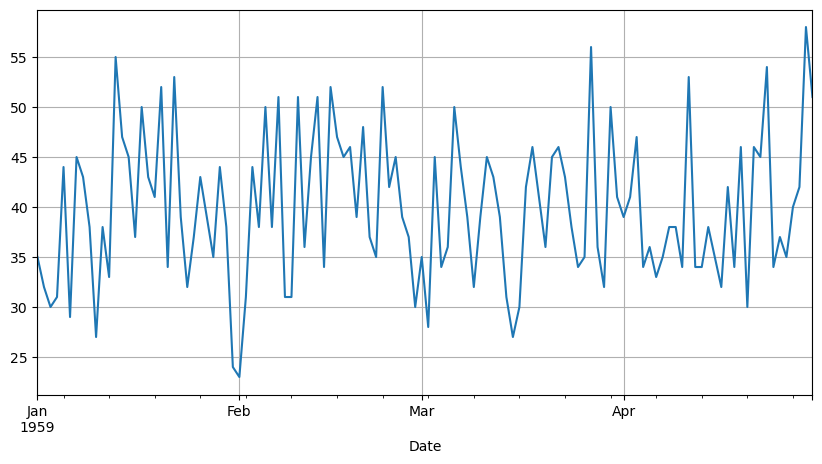

In [16]:
df1['Births'].plot(figsize = (10, 5), grid = True)

### ADF test to confirm stationarity

In [17]:
from statsmodels.tsa.stattools import adfuller

# function for generating ADF interpretation report
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print('\nConclusion:')
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print('\nConclusion:')
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [18]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00

Conclusion:
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [20]:
auto_arima(df1['Births'], seasonal=False, stationary=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Fri, 25 Aug 2023   AIC                            823.489
Time:                        11:49:41   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""